## SIR Epidemic Model
### Runge-Kutta 3(2) solver
### Runge-Kutta 5(4) solver
### Radau

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
N = 1000 # number of population
I0, R0 = 1., 0 # initial number of infected and recovered individual
S0 = N - I0 - R0 # susceptible individuals to infection initially is deduced
beta = 4/10
gamma = 1/10
tmax = 100 # grid of time points (in days)
Nt = 100
t = np.linspace(0,tmax,Nt+1)

In [3]:
# define the ODE
def diff_equation(t,X,beta,gamma):
	S, I, R = X
	dSdt = -beta * S * I / N
	dIdt = beta * S * I / N - gamma * I
	dRdt = gamma * I
	return np.array([dSdt, dIdt, dRdt])

In [4]:
X0 = S0, I0, R0 # initial conditions

### Explicit Runge-Kutta 3(2)

In [5]:
# Explicit Runge-Kutta 3(2) solver
solrk23 = integrate.solve_ivp(
	diff_equation,
	[0, tmax],
	X0,
	method="RK23",
	args=(beta,gamma),
	t_eval=t)
print(solrk23)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 9.990e+02  9.985e+02 ...  1.980e+01  1.980e+01]
            [ 1.000e+00  1.349e+00 ...  9.424e-01  8.595e-01]
            [ 0.000e+00  1.166e-01 ...  9.793e+02  9.793e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0


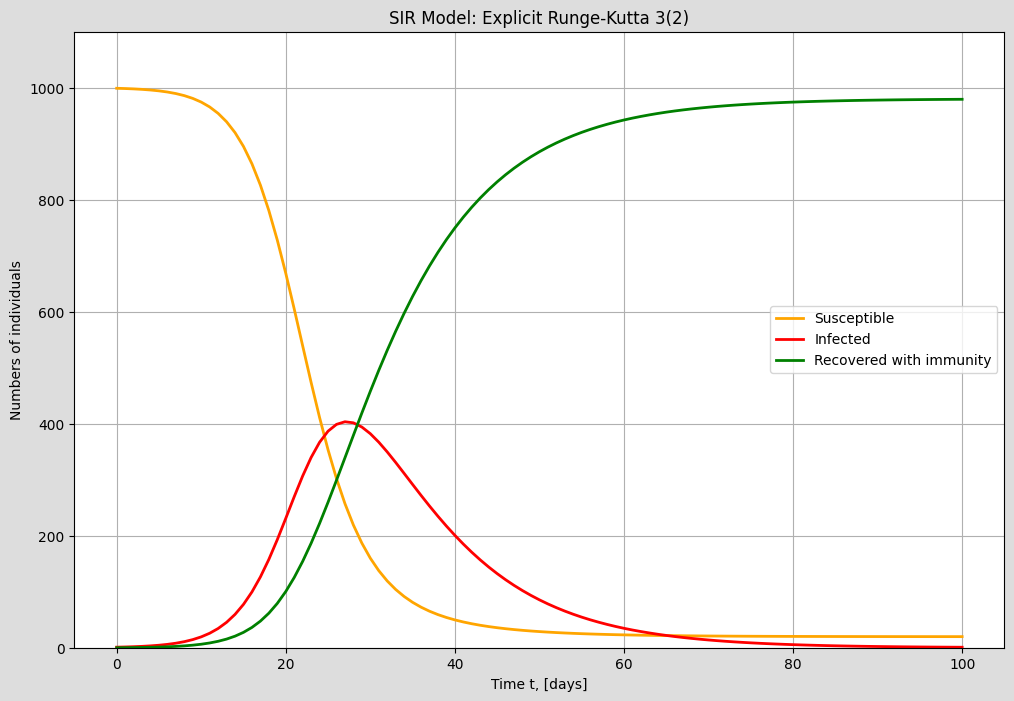

In [6]:
# plotting
plt.figure(facecolor = "#dddddd", figsize=(12,8))
plt.title("SIR Model: Explicit Runge-Kutta 3(2)")
plt.grid()
plt.plot(solrk23.t, solrk23.y[0], "orange", lw=2, label="Susceptible")
plt.plot(solrk23.t, solrk23.y[1], "r", lw=2, label="Infected")
plt.plot(solrk23.t, solrk23.y[2], "g", lw=2, label="Recovered with immunity")
plt.xlabel("Time t, [days]")
plt.ylabel("Numbers of individuals")
plt.ylim([0,N+100])
plt.legend()
plt.show()

### Explicit Runge-Kutta 5(4)

In [7]:
solrk45 = integrate.solve_ivp(
	diff_equation,
	[0, tmax],
	X0,
	method="RK45",
	args=(beta,gamma),
	t_eval=t)
print(solrk45)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 9.990e+02  9.985e+02 ...  1.979e+01  1.979e+01]
            [ 1.000e+00  1.349e+00 ...  9.699e-01  8.847e-01]
            [ 0.000e+00  1.166e-01 ...  9.792e+02  9.793e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 110
     njev: 0
      nlu: 0


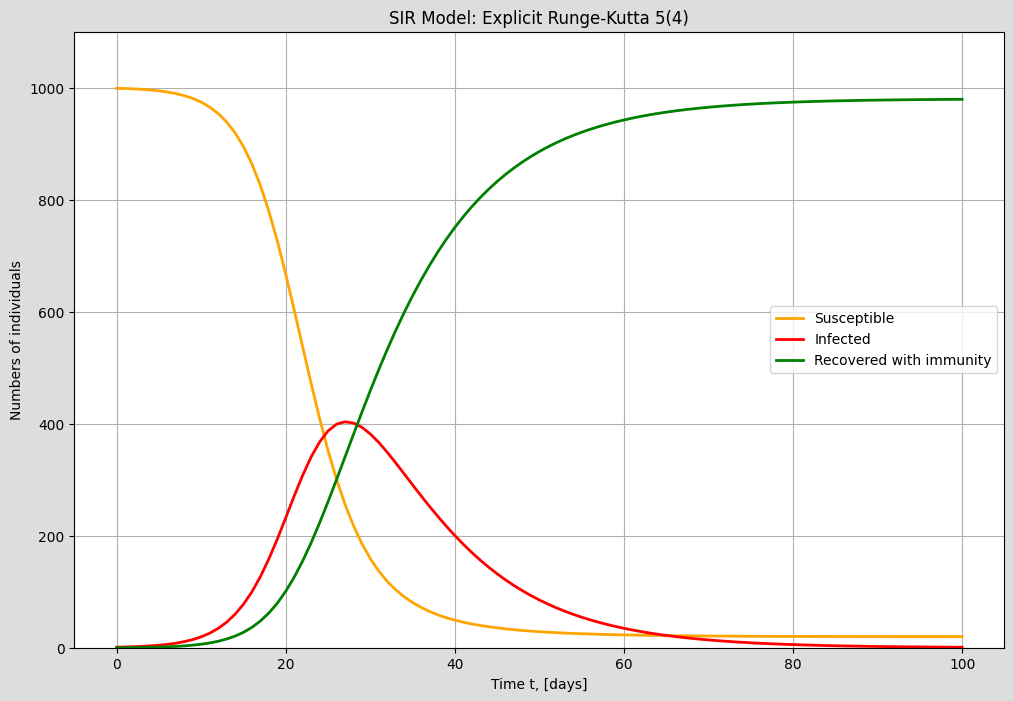

In [8]:
# plotting
plt.figure(facecolor = "#dddddd", figsize=(12,8))
plt.title("SIR Model: Explicit Runge-Kutta 5(4)")
plt.grid()
plt.plot(solrk45.t, solrk45.y[0], "orange", lw=2, label="Susceptible")
plt.plot(solrk45.t, solrk45.y[1], "r", lw=2, label="Infected")
plt.plot(solrk45.t, solrk45.y[2], "g", lw=2, label="Recovered with immunity")
plt.xlabel("Time t, [days]")
plt.ylabel("Numbers of individuals")
plt.ylim([0,N+100])
plt.legend()
plt.show()

### Implicit Runge-Kutta method of the Radau IIA family

In [9]:
solradau = integrate.solve_ivp(
	diff_equation,
	[0, tmax],
	X0,
	method="Radau",
	args=(beta,gamma),
	t_eval=t)
print(solradau)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  9.900e+01  1.000e+02]
        y: [[ 9.990e+02  9.985e+02 ...  1.989e+01  1.988e+01]
            [ 1.000e+00  1.349e+00 ...  9.713e-01  8.860e-01]
            [ 0.000e+00  1.166e-01 ...  9.791e+02  9.792e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 209
     njev: 7
      nlu: 34


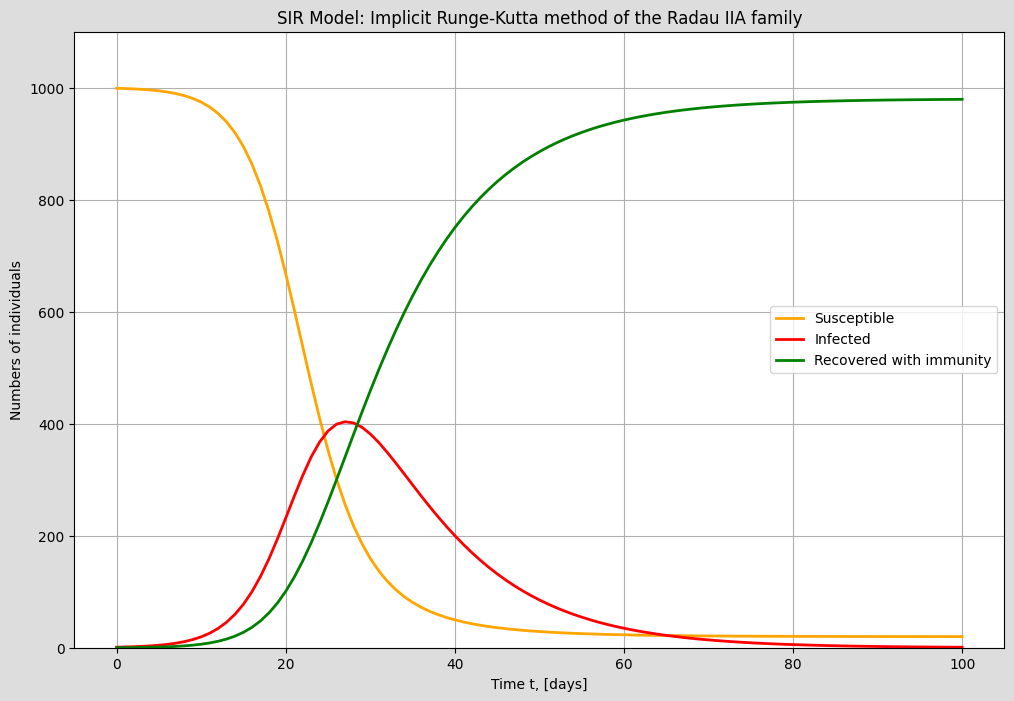

In [10]:
# plotting
plt.figure(facecolor = "#dddddd", figsize=(12,8))
plt.title("SIR Model: Implicit Runge-Kutta method of the Radau IIA family")
plt.grid()
plt.plot(solradau.t, solradau.y[0], "orange", lw=2, label="Susceptible")
plt.plot(solradau.t, solradau.y[1], "r", lw=2, label="Infected")
plt.plot(solradau.t, solradau.y[2], "g", lw=2, label="Recovered with immunity")
plt.xlabel("Time t, [days]")
plt.ylabel("Numbers of individuals")
plt.ylim([0,N+100])
plt.legend()
plt.show()